Import all the libraries and the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("vgsales.csv")

In [11]:
print("Dataset Overview:")
df.head()

Dataset Overview:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Find the total null values in the dataset

In [12]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

To remove the null values use of ffill (taking the previous row's value) for year and mode for publishers

In [15]:
df['Year'] = df['Year'].fillna(method='ffill')

In [16]:
df['Publisher'] = df['Publisher'].fillna(df['Publisher'].mode()[0])

Check the number of null values again

In [17]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Info of the dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


No null values and most prevalent values are numeric

In [19]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.409326,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.820108,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


The most predominant year of games is 2006, highest indiviual sales are from North America

Univariate distributions

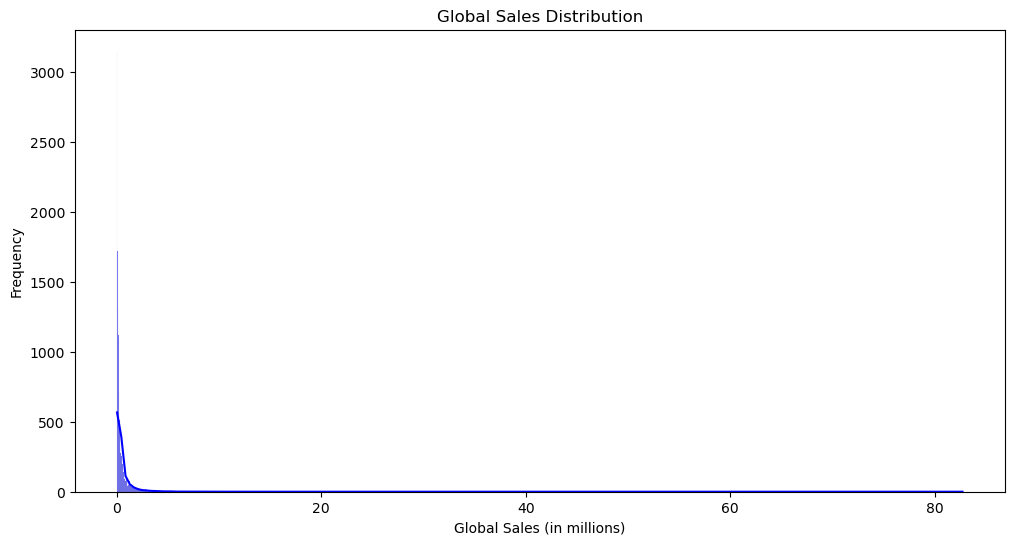

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

plt.figure(figsize=(12, 6))
sns.histplot(df['Global_Sales'], kde=True, color='blue')
plt.title("Global Sales Distribution")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Frequency")
plt.show()

Sales distributions Globally, since the data is from the early 2000s, the sales are below 10 million dollars.

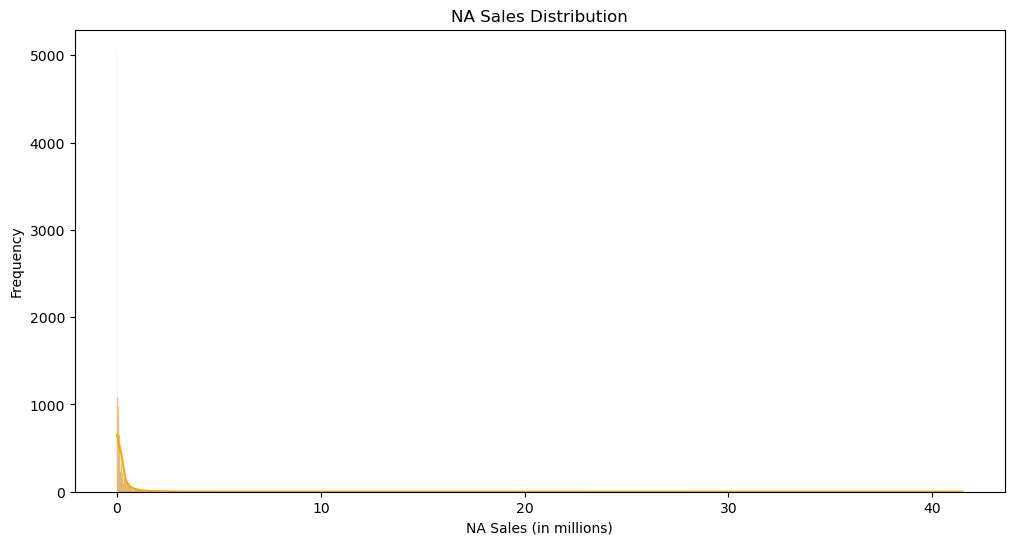

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(df['NA_Sales'], kde=True, color='orange')
plt.title("NA Sales Distribution")
plt.xlabel("NA Sales (in millions)")
plt.ylabel("Frequency")
plt.show()

Similar to global sales distribution, the north america sales distribution is also below 10 million

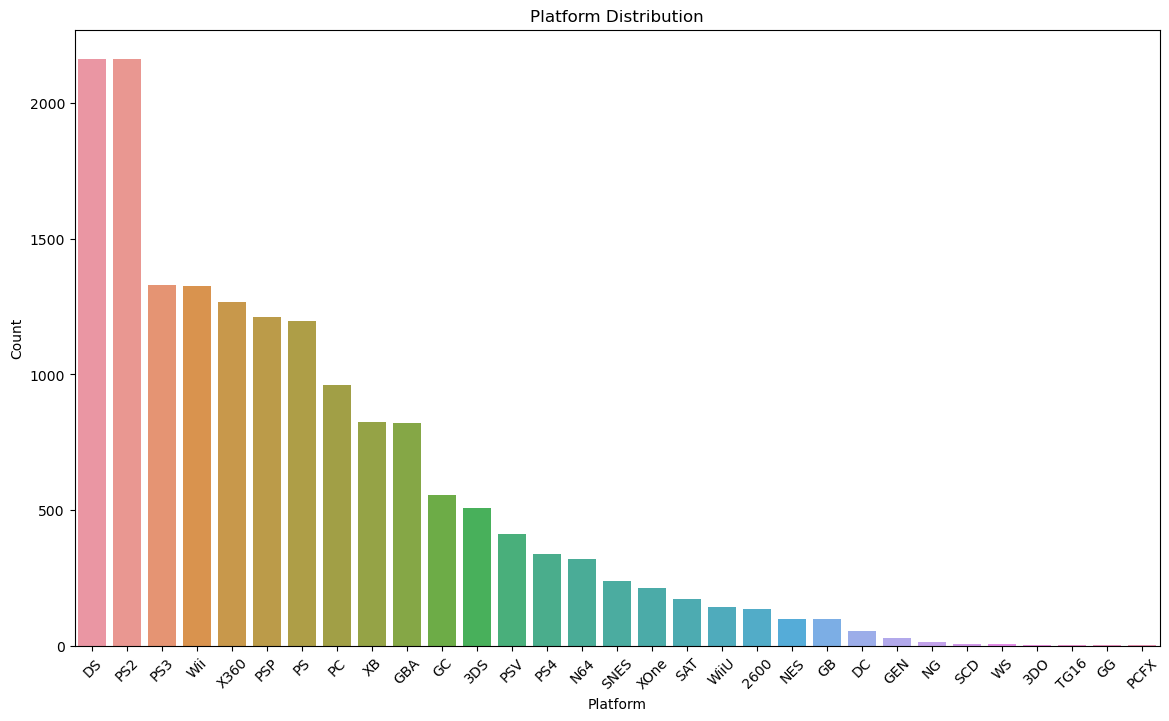

In [23]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Platform', order=df['Platform'].value_counts().index)
plt.title("Platform Distribution")
plt.xlabel("Platform")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Platform distribution tells us the DS from Nintendo is the most popular platform followed by Sony's PS2 and PS3

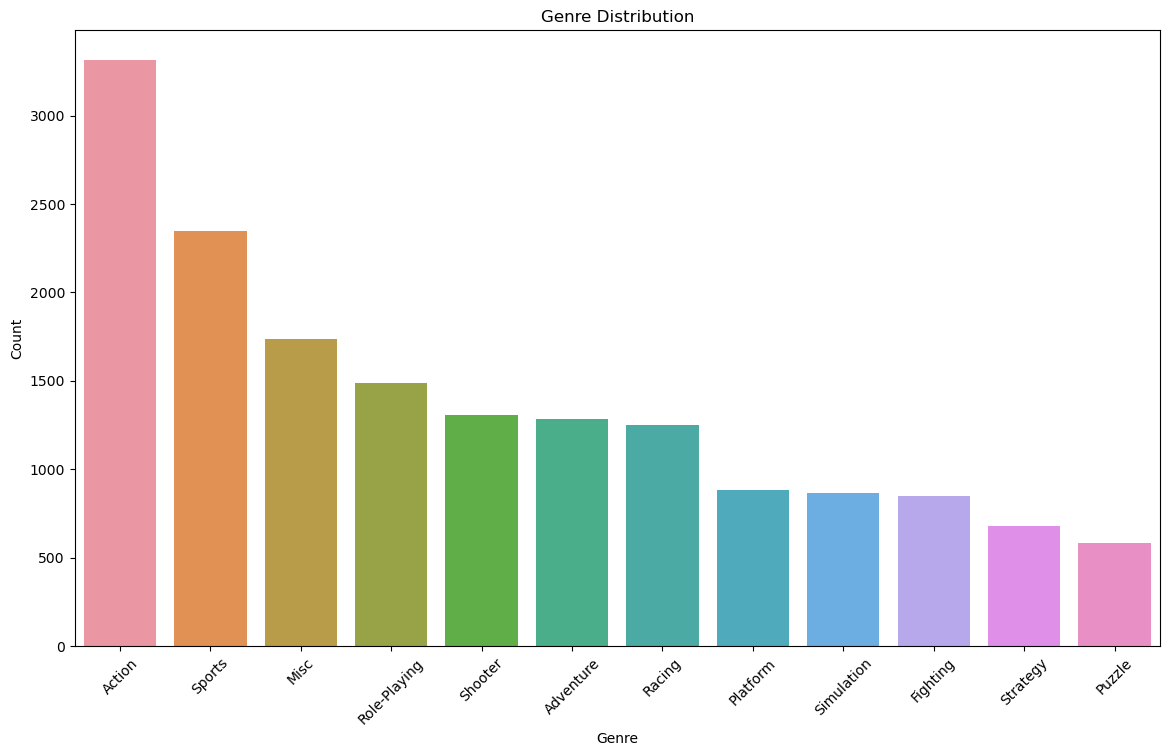

In [24]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

The most prevalent genre is action, this means this genre is most popular with the audience and hence has more production

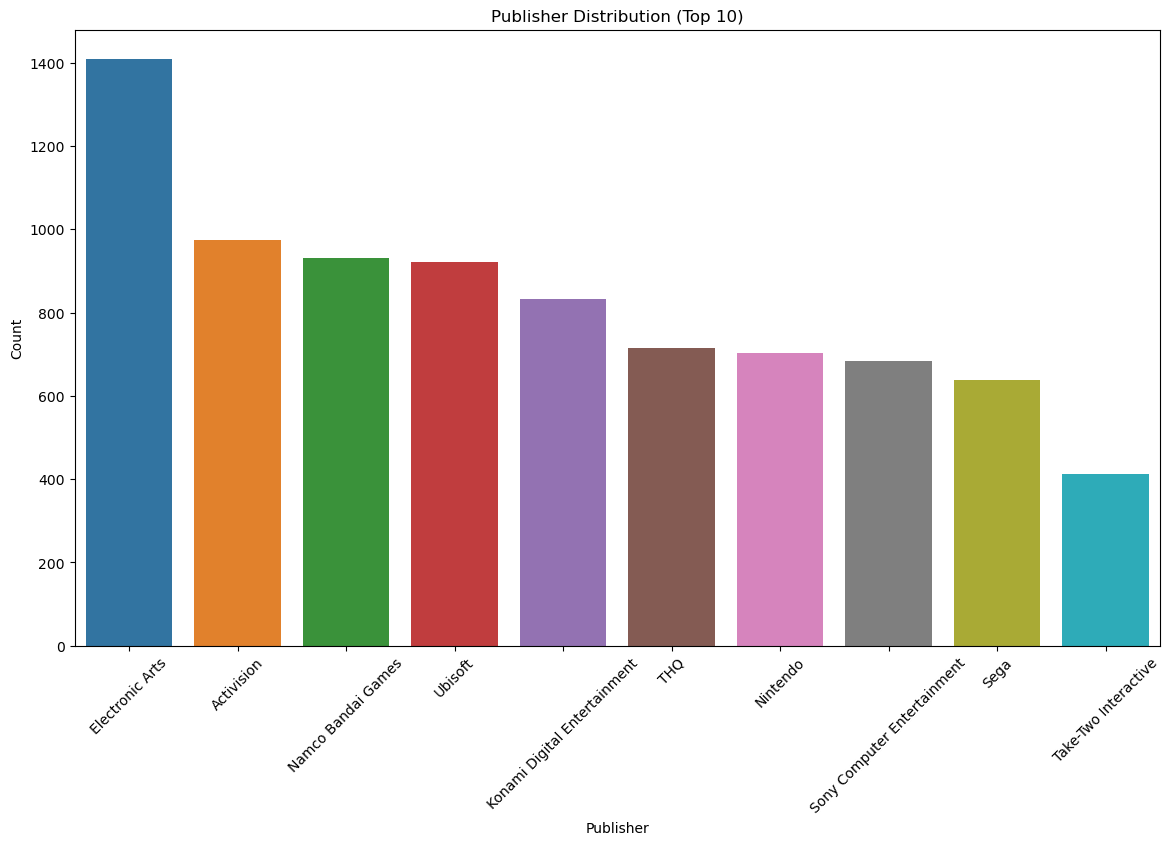

In [25]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Publisher', order=df['Publisher'].value_counts().index[:10])  # Top 10 publishers
plt.title("Publisher Distribution (Top 10)")
plt.xlabel("Publisher")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

EA is most prevalent publisher, followed by activision and namco bandai

Multivariate distributions

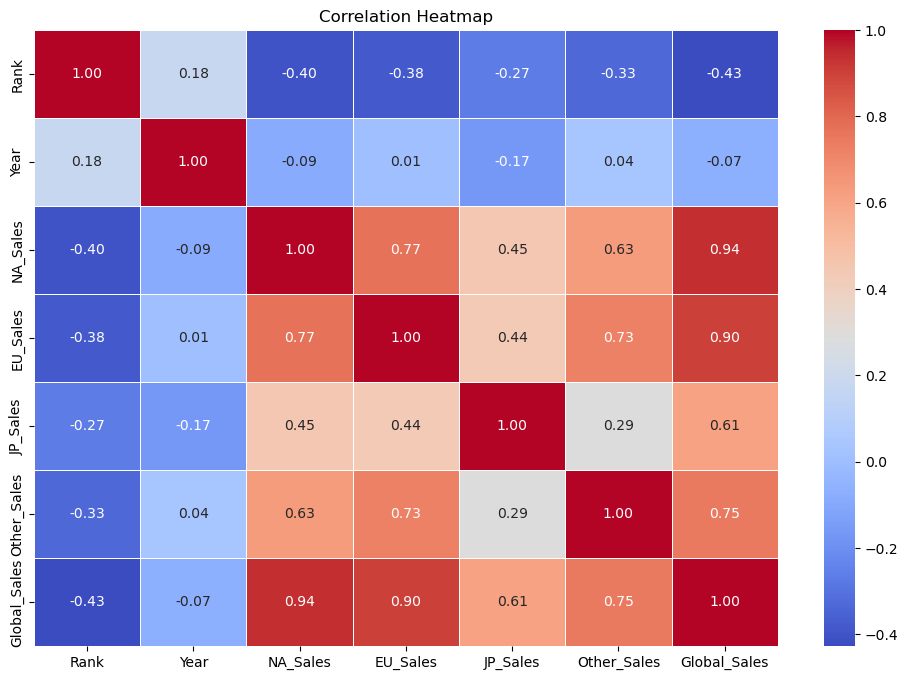

In [30]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

This tells us that NA sales and EU sales are the most contributor to the global sales value.

Bivariate distributions

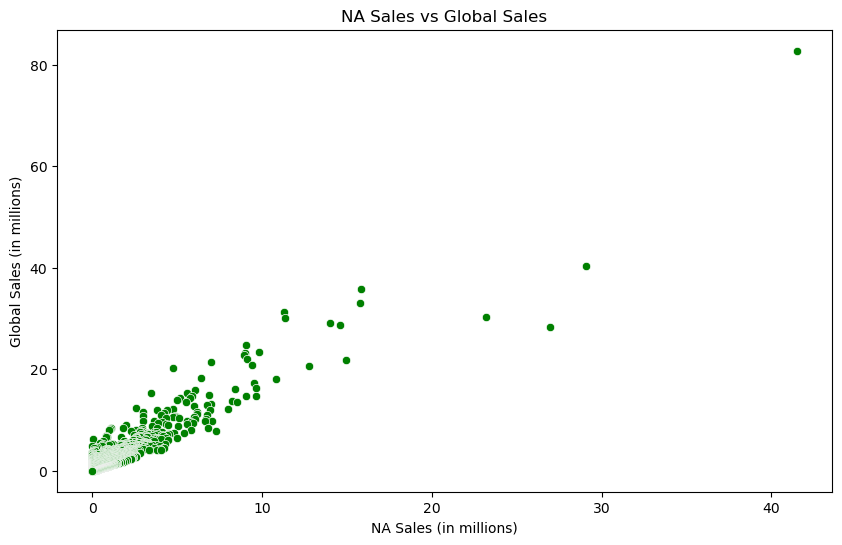

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='NA_Sales', y='Global_Sales', color='green')
plt.title("NA Sales vs Global Sales")
plt.xlabel("NA Sales (in millions)")
plt.ylabel("Global Sales (in millions)")
plt.show()

Outliers

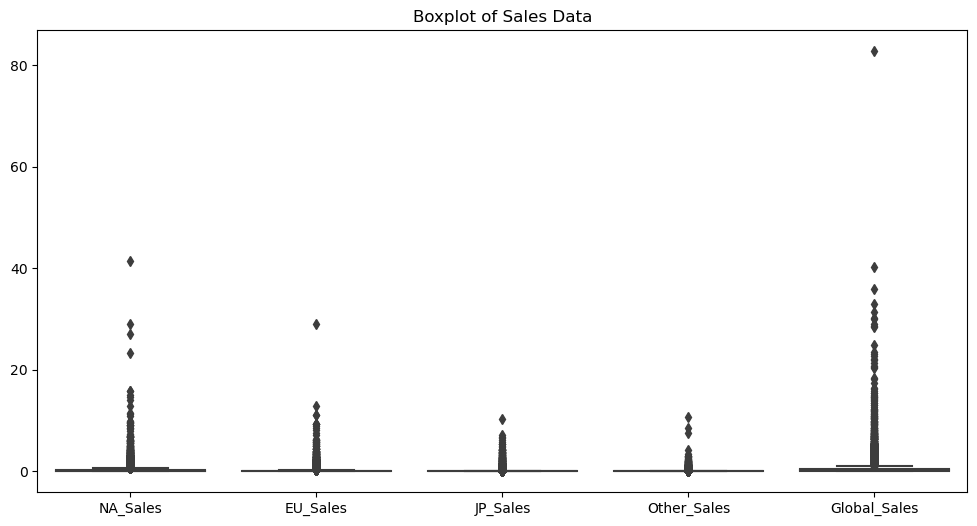

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
plt.title("Boxplot of Sales Data")
plt.show()

Outlier count

In [29]:
from scipy.stats import zscore
z_scores = np.abs(zscore(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]))
outliers = (z_scores > 3).sum(axis=0)
print(f"\nNumber of outliers (z-score > 3): {outliers}")


Number of outliers (z-score > 3): NA_Sales        174
EU_Sales        214
JP_Sales        238
Other_Sales     177
Global_Sales    181
dtype: int64


Defining the independent and dependent variable

In [31]:
X = df[['NA_Sales']]
y = df['Global_Sales']

Scatter plot between X and y

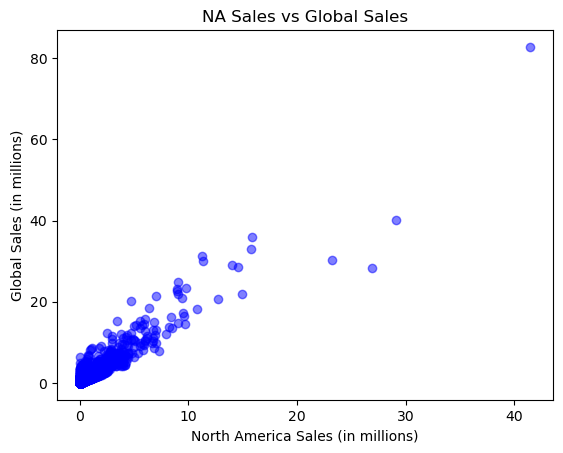

In [32]:
plt.scatter(X, y, color='blue', alpha=0.5)
plt.xlabel("North America Sales (in millions)")
plt.ylabel("Global Sales (in millions)")
plt.title("NA Sales vs Global Sales")
plt.show()

Train test split 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")
model = LinearRegression()
model.fit(X_train, y_train)

Training set shape: X_train=(13278, 1), y_train=(13278,)
Testing set shape: X_test=(3320, 1), y_test=(3320,)


LinearRegression()

Defining the intercept and the slope of the model

In [35]:
intercept = model.intercept_
slope = model.coef_[0]
print(f"Intercept (b0): {intercept:.4f}")
print(f"Slope (b1): {slope:.4f}")

Intercept (b0): 0.0764
Slope (b1): 1.7362


First 10 predicitions

In [36]:
y_pred = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\nActual vs Predicted values (first 10 rows):")
print(comparison.head(10))


Actual vs Predicted values (first 10 rows):
   Actual  Predicted
0    0.15   0.093793
1    0.40   0.632023
2    0.02   0.076430
3    0.03   0.093793
4    0.36   0.423676
5    2.24   2.142541
6    0.39   0.388951
7    0.65   1.048718
8    0.21   0.371589
9    0.44   0.076430


Plotting the regression line

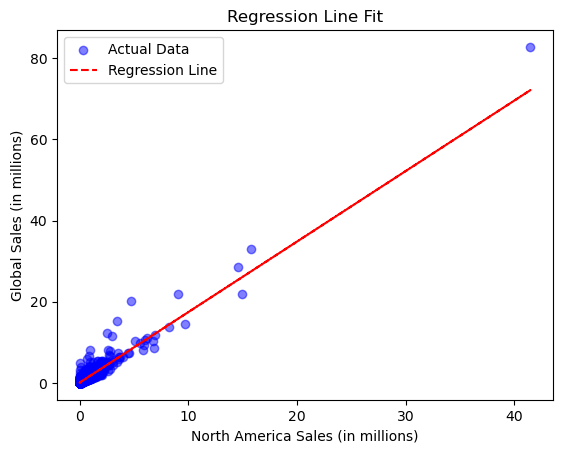

In [37]:
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual Data")
plt.plot(X_test, y_pred, color='red', linestyle="--", label="Regression Line")
plt.xlabel("North America Sales (in millions)")
plt.ylabel("Global Sales (in millions)")
plt.title("Regression Line Fit")
plt.legend()
plt.show()

Evaluation of the model

In [38]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [39]:
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.2049
Mean Squared Error (MSE): 0.3165
Root Mean Squared Error (RMSE): 0.5626
R-squared (R²) Score: 0.9247


Since the error values are low and the R-squared value is high, this tells us that our model is very good, giving accurate predictions